In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # 그래프 작성
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
df_ind = pd.read_csv('data/diabetes.csv')
df_ind.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# 상관계수 구하기 
df_ind_corr =df_ind.corr()
df_ind_corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [18]:
# Outcome과 다른 변수들의 상관계수만 추출해보기 
outcome_corr = df_ind_corr['Outcome'].drop('Outcome')
outcome_corr

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Name: Outcome, dtype: float64

In [19]:
# 절댓값 기준 정렬
outcome_corr_abs = outcome_corr.abs().sort_values(ascending=False)

outcome_corr_abs

Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## Glucose(혈당)이 Outcome과의 상관계수가 가장 큼
## 결론 :  혈당 수치가 높을수록 당뇨병 발생 가능성 높다.

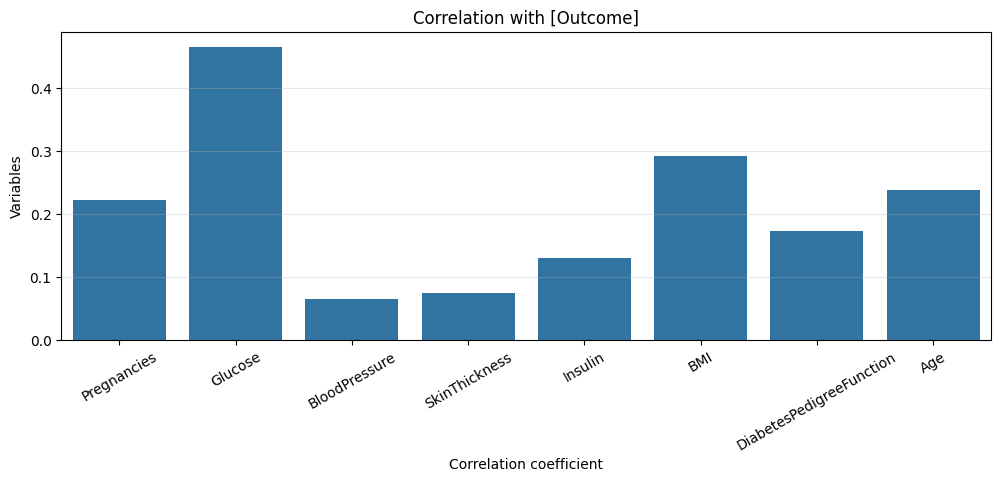

In [41]:
plt.figure(figsize=(12,4))
sns.barplot(
    x=outcome_corr.index,
    y=outcome_corr.values
)
plt.title("Correlation with [Outcome]") # Outcome의 상관관계 
plt.xlabel("Correlation coefficient") # 상관계수 
plt.ylabel("Variables") # 변수 
plt.xticks(rotation = 30)
plt.grid(axis ="y",alpha = 0.3)
plt.show()

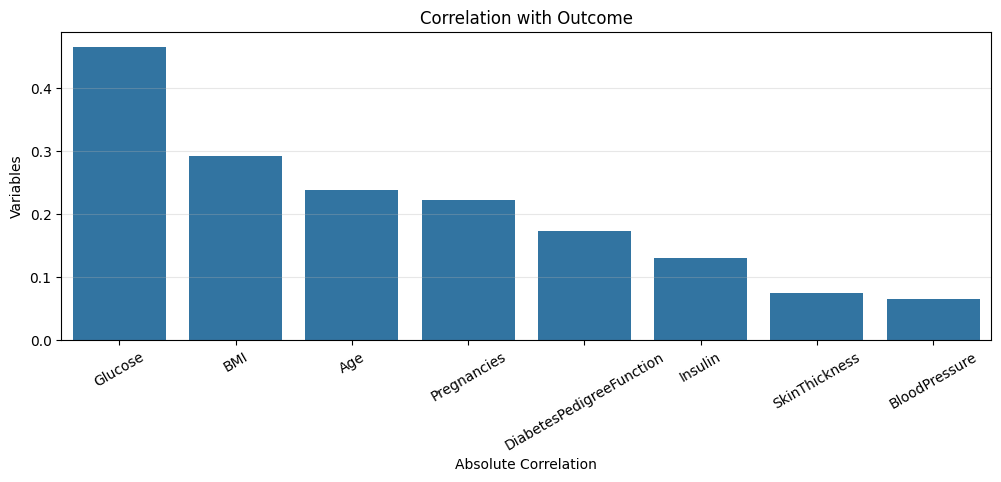

In [32]:
plt.figure(figsize=(12,4))
sns.barplot(
    x=outcome_corr_abs.index,
    y=outcome_corr_abs.values
)
plt.title("Correlation with Outcome") # Outcome의 상관관계 
plt.xlabel("Absolute Correlation") # 절대 상관계수 
plt.ylabel("Variables") # 변수 
plt.xticks(rotation = 30)
plt.grid(axis ="y",alpha = 0.3)
plt.show()